In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from numpy import sqrt
import scipy

In [40]:
def New_MainMoving(r1i,r2i,r3i,l1,l2,stepnum):

    r1=r1i.copy()
    r2=r2i.copy()
    r3=r3i.copy()
    rci = (r1i + r2i + r3i)/3


    for i in range(stepnum-1):

    

 
        
        MM = np.array([[1,   R*1.5/np.linalg.norm(r2-r1),    R*1.5/np.linalg.norm(r3-r1)],
                       [R*1.5/np.linalg.norm(r2-r1),  1,     R*1.5/np.linalg.norm(r2-r3)],
                       [R*1.5/np.linalg.norm(r3-r1),  R*1.5/np.linalg.norm(r3-r2),   1]
                       
                       
                       ])
        
        RR=np.array([1, 1, 1])
        NN=np.matmul(RR,np.linalg.inv(MM))  
        OO=np.array([[r1-r2,  r2-r1, 0],
        [0, r2-r3,  r3-r2]])
        AA = np.concatenate((OO,NN.reshape((1,3))),axis=0)  
        BB=np.array([l1[i]*(l1[i+1]-l1[i]),
        l2[i]*(l2[i+1]-l2[i]),
        0
    ])



        DIF=np.linalg.solve(AA,BB)

        r1 += DIF[0]
        r2 += DIF[1]
        r3 += DIF[2]

    r1f=r1
    r2f=r2
    r3f=r3

    rcf = (r1f + r2f + r3f)/3
    return r1f,r2f,r3f,rcf-rci

In [41]:
T=1
R=1
stepnum=10000
data1 = np.zeros((100))
D=10.*R
epsilons = D*np.linspace(0.01,0.4,100)
for i in range(100):
    E = epsilons[i]
    W=E/T
    stepnum=10000



    r1i = np.array(D-E)
    r2i = np.array(0.)
    r3i = np.array(-D+E)
    
    
    time=np.linspace(0.,T,stepnum)
    opening=D-E+W*time  #il
    closing=D-W*time  #dl
    closed=(D-E)*np.ones(stepnum) #cls
    opened=D*np.ones(stepnum)  #cll
        
    r1i,r2i,r3i,dataaaa =New_MainMoving(r1i,r2i,r3i,opening,closed,stepnum)


    data1[i] = dataaaa
    
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


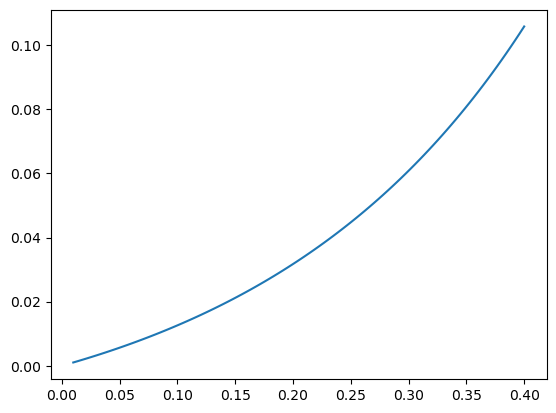

In [42]:
plt.plot(epsilons/D,np.abs(data1)/R)

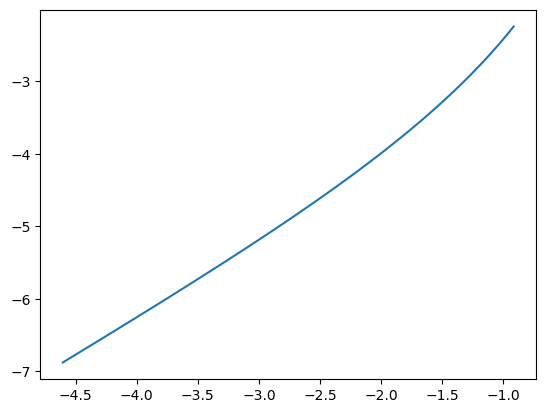

In [43]:
plt.plot(np.log(epsilons[:]/D),np.log(np.abs(data1[:]/R)))

In [44]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[20:]),np.log(np.abs(data1[20:])))
print(slope,r_value)

1.5222951616950477 0.9971384767672032


In [28]:
T=1
R=0.00001
stepnum=10000
data2 = np.zeros((100))
D=10.*R
epsilons = D*np.linspace(0.01,0.4,100)
for i in range(100):
    E = epsilons[i]
    W=E/T
    stepnum=10000



    r1i = np.array(D-E)
    r2i = np.array(0.)
    r3i = np.array(-D+E)
    
    
    time=np.linspace(0.,T,stepnum)
    opening=D-E+W*time  #il
    closing=D-W*time  #dl
    closed=(D-E)*np.ones(stepnum) #cls
    opened=D*np.ones(stepnum)  #cll
            
    r1i,r2i,r3i,_ =New_MainMoving(r1i,r2i,r3i,opening,closed,stepnum)
    r1i,r2i,r3i,_ =New_MainMoving(r1i,r2i,r3i,opened,opening,stepnum)
    r1i,r2i,r3i,_ =New_MainMoving(r1i,r2i,r3i,closing,opened,stepnum)
    r1i,r2i,r3i,dataaaa =New_MainMoving(r1i,r2i,r3i,closed,closing,stepnum)


    data2[i] = dataaaa
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


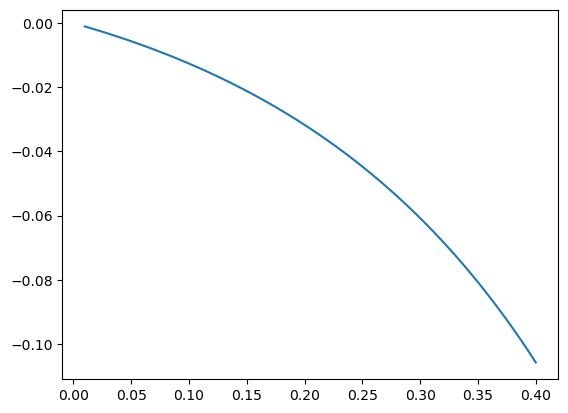

In [29]:
plt.plot(epsilons/D,data2/R)

In [30]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons),np.log(np.abs(data2)))
print(slope,r_value)

1.3014291449956823 0.9945250410895259


In [31]:
r1i,r2i,r3i

(array(5.82790856e-05), array(-1.7209144e-06), array(-6.17209144e-05))

In [38]:
r3i-r2i

-6.0000000000000544e-05

In [33]:
R

1e-05